# Images and Classifiers for Devanagari digits
Check the following dataset:
https://archive.ics.uci.edu/ml/datasets/Devanagari+Handwritten+Character+Datase

# Read images from Train/digit_X; convert to gray-scale values; attach label

In [123]:
#installing cv2
#pip install opencv-python
# this had to be done from the anaconda prompt
# installed tensorflow through anaconda navigator

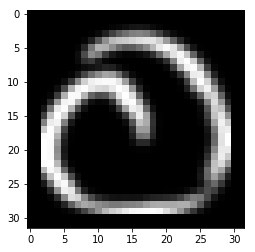

In [124]:
# maybe use keras and tesnforflow
# use tutorial for cats and dogs https://www.youtube.com/watch?v=j-3vuBynnOE
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/bulatao/Documents/GitHub/Data-Science-Classes/DevanagariHandwrittenCharacterDataset/Train"

CATEGORIES = ["digit_0", "digit_1","digit_2","digit_3","digit_4","digit_5","digit_6","digit_7","digit_8","digit_9"]

for category in CATEGORIES:  # 0 through 9
    path = os.path.join(DATADIR,category)  # create path to folders with samples
    for img in os.listdir(path):  # iterate over each image 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


In [125]:
print(img_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [126]:
print(img_array.shape)


(32, 32)


In [128]:

training_data = []

IMG_SIZE = 32

def create_training_data():
    for category in CATEGORIES:  # for digits 0 to 9

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0 = digit_0, 1 = digit_1

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████| 1700/1700 [00:01<00:00, 863.06it/s]


17000


In [129]:
training_data[1]

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]

In [131]:
import random # this didn't seem to affect accuracy too much, but was recommended

random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

8
9
0
8
5
6
0
2
6
4


In [132]:
# Create Training Data and Labels
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1)) 

X = np.array(X)
y = np.array(y)
X[1]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0, 255, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [133]:
X.shape

(17000, 32, 32)

In [134]:
# need to create test data

In [135]:
test_data = []

def create_test_data():
    for category in CATEGORIES:  # for digits 0 to 9

        path = os.path.join("C:/Users/bulatao/Documents/GitHub/Data-Science-Classes/DevanagariHandwrittenCharacterDataset/Test",category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0 = digit_0, 1 = digit_1

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([img_array, class_num])  # add this to our test_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_test_data()

print(len(test_data))

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 514.09it/s]


3000


In [136]:
# shuffle test data
random.shuffle(test_data)
for sample in test_data[:10]:
    print(sample[1])

8
8
7
1
6
6
8
6
6
9


In [137]:
# Create Test Data and Labels
X_test = []
y_test = []

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

#print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1)) 

X_test = np.array(X_test) # change from list to np array
y_test = np.array(y_test)

In [138]:
#X_test = tf.keras.utils.normalize(X_test, axis=1)

In [141]:
y[1]

9

# Now we'll make a Tensorflow Classifier

In [142]:
# https://pythonprogramming.net/convolutional-neural-network-deep-learning-python-tensorflow-keras/

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [143]:
# let's normalize the data
# this portion here made a huge difference in accuracy
X = tf.keras.utils.normalize(X, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [144]:
X[1]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.88234766, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [145]:
# build the model
# reference here: https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=3)

Epoch 1/3
17000/17000 [==============================] - ETA: 2:54 - loss: 2.3498 - acc: 0.062 - ETA: 18s - loss: 2.1080 - acc: 0.329 - ETA: 9s - loss: 1.7872 - acc: 0.5000 - ETA: 7s - loss: 1.5164 - acc: 0.592 - ETA: 5s - loss: 1.3334 - acc: 0.636 - ETA: 5s - loss: 1.1866 - acc: 0.674 - ETA: 4s - loss: 1.0505 - acc: 0.706 - ETA: 4s - loss: 0.9709 - acc: 0.727 - ETA: 3s - loss: 0.9015 - acc: 0.743 - ETA: 3s - loss: 0.8407 - acc: 0.760 - ETA: 3s - loss: 0.7989 - acc: 0.770 - ETA: 3s - loss: 0.7533 - acc: 0.783 - ETA: 3s - loss: 0.7126 - acc: 0.795 - ETA: 3s - loss: 0.6854 - acc: 0.803 - ETA: 2s - loss: 0.6602 - acc: 0.809 - ETA: 2s - loss: 0.6372 - acc: 0.816 - ETA: 2s - loss: 0.6165 - acc: 0.823 - ETA: 2s - loss: 0.5993 - acc: 0.827 - ETA: 2s - loss: 0.5870 - acc: 0.830 - ETA: 2s - loss: 0.5692 - acc: 0.834 - ETA: 2s - loss: 0.5573 - acc: 0.837 - ETA: 2s - loss: 0.5468 - acc: 0.840 - ETA: 2s - loss: 0.5383 - acc: 0.843 - ETA: 2s - loss: 0.5310 - acc: 0.845 - ETA: 2s - loss: 0.5239 - ac

In [ ]:
# Not too bad. 98.05% accuracy in 3 epochs

# Try it with a Decision Tree Classifier

In [148]:
type(y)

numpy.ndarray

In [117]:
X.shape

(17000, 32, 32)

In [155]:
X = X.reshape(X.shape[0],-1) # need to reshape since fitting with current shape throws errors


In [156]:
X.shape

(17000, 1024)

In [151]:
X_test = X_test.reshape(X_test.shape[0],-1)
X_test.shape

(3000, 1024)

In [153]:
import sklearn.metrics as metrics

In [154]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
print(cm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       300
           1       0.93      0.91      0.92       300
           2       0.79      0.82      0.80       300
           3       0.78      0.75      0.77       300
           4       0.94      0.90      0.92       300
           5       0.86      0.80      0.83       300
           6       0.78      0.81      0.80       300
           7       0.87      0.89      0.88       300
           8       0.90      0.93      0.91       300
           9       0.91      0.93      0.92       300

   micro avg       0.87      0.87      0.87      3000


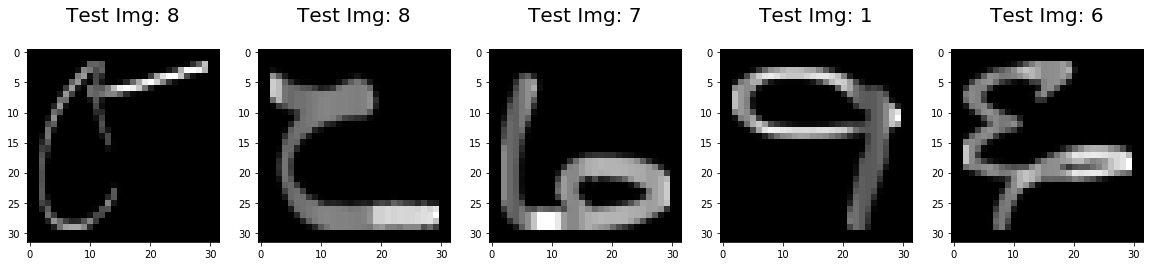

In [158]:
plt.figure(figsize=(20,4)) # let's see what the images look like. quick sanity check
for index, (image, label) in enumerate(zip(X_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (32,32)), cmap=plt.cm.gray)
    plt.title('Test Img: %i\n' % label, fontsize = 20)

In [159]:
## Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       300
           1       0.92      0.93      0.92       300
           2       0.67      0.85      0.75       300
           3       0.79      0.61      0.69       300
           4       0.93      0.90      0.92       300
           5       0.86      0.81      0.83       300
           6       0.84      0.84      0.84       300
           7       0.85      0.82      0.83       300
           8       0.95      0.95      0.95       300
           9       0.86      0.93      0.90       300

   micro avg       0.86      0.86      0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000

[[279   0   0   0   0   0   2   9   0  10]
 [  0 278   6   1   5   1   1   2   0   6]
 [  0   4 256  21   0   4   7   5   2   1]
 [  0   2  80 183   2  12   7   4   1   9]
 [  0   5   1   2 271   

In [160]:
# Knn- classification
# k-Nearest Neighbor Classification
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X,y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       300
           1       0.98      0.99      0.98       300
           2       0.92      0.97      0.95       300
           3       0.97      0.93      0.95       300
           4       0.99      1.00      0.99       300
           5       0.97      0.96      0.97       300
           6       0.99      0.97      0.98       300
           7       0.99      0.99      0.99       300
           8       0.99      1.00      0.99       300
           9       0.99      0.98      0.98       300

   micro avg       0.98      0.98      0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

[[298   0   0   0   0   0   0   0   2   0]
 [  0 297   0   0   2   0   0  